***Der Weg ins das AirBnB-usiness***

In [ ]:
# Imports
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

***Datenvorbereitung***

In [266]:
# Darstellungseinstellungen
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10,6)

# Korrigierter Pfad mit raw-string
file_path = "Datensatz_Airbnb.csv"
df = pd.read_csv(file_path)

df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

***Preisverteilung am Tag***

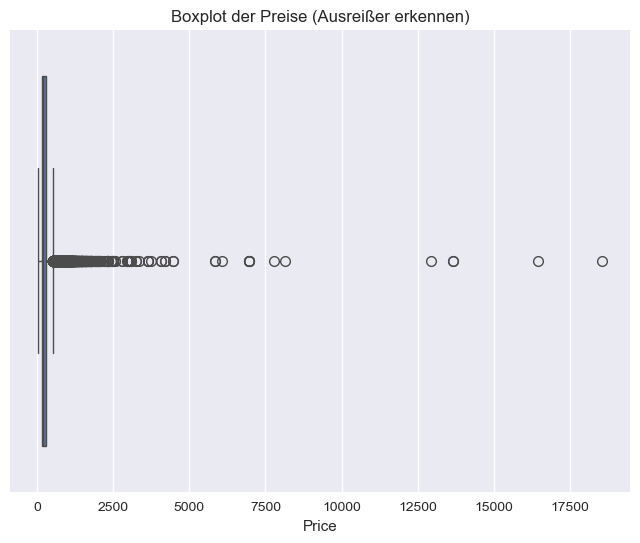

In [248]:
# Ausreißercheck für Preis
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot der Preise (Ausreißer erkennen)')
plt.show()

In [250]:
mean_preise = df.groupby('City')['Price'].mean().round(2)
print(mean_preise)

City
Amsterdam    573.11
Athens       151.74
Barcelona    293.75
Berlin       244.58
Budapest     176.51
Lisbon       238.21
Paris        392.53
Rome         205.39
Vienna       241.58
Name: Price, dtype: float64


In [ ]:
# Medianpreis pro Stadt und Tag berechnen
mean_prices = df.groupby(["City", "Day"])["Price"].mean().reset_index()

# Plotly grouped bar chart
fig = px.bar(
    mean_prices,
    x="Price",
    y="City",
    color="Day",
    orientation="h",
    barmode="group",  # nebeneinander gruppieren
    labels={"Price": "Ø Preis", "City": "Stadt", "Day": "Tag"},
    title="Ø Preis pro Stadt nach Wochentag/Wochenende",
    color_discrete_map={"Weekday": "skyblue", "Weekend": "salmon"}
)

# Skala der X-Achse auf 0–600 setzen
fig.update_layout(xaxis=dict(range=[0, 600]))

fig.show()


In [ ]:
# Medianpreis pro Stadt und Tag berechnen
median_prices = df.groupby(["City", "Day"])["Price"].median().reset_index()

# Plotly grouped bar chart
fig = px.bar(
    median_prices,
    x="Price",
    y="City",
    color="Day",
    orientation="h",
    barmode="group",  # nebeneinander gruppieren
    labels={"Price": "Median Preis", "City": "Stadt", "Day": "Tag"},
    title="Medianpreis pro Stadt nach Wochentag/Wochenende",
    color_discrete_map={"Weekday": "skyblue", "Weekend": "salmon"}
)

# Skala der X-Achse auf 0–600 setzen
fig.update_layout(xaxis=dict(range=[0, 600]))

fig.show()


In [252]:
median_preise = df.groupby('City')['Price'].median().round(2)
print(median_preise)

City
Amsterdam    460.24
Athens       127.72
Barcelona    208.30
Berlin       191.18
Budapest     152.98
Lisbon       225.38
Paris        317.60
Rome         182.59
Vienna       208.49
Name: Price, dtype: float64


***Hat der Superhost eine Auswirkung?***

In [253]:
fig = px.box(
    df,
    x='Superhost',
    y='Guest Satisfaction',
    color='Superhost',
    color_discrete_map={True:'green', False:'red'},
    title='Guest Satisfaction nach Superhost-Status'
)
fig.show()

In [306]:
mean_df = df.groupby('Superhost', as_index=False)['Guest Satisfaction'].mean()
fig = px.bar(
    mean_df,
    x='Superhost',
    y='Guest Satisfaction',
    color='Superhost',
    color_discrete_map={True:'green', False:'red'},
    title='Durchschnittliche Guest Satisfaction nach Superhost'
)
fig.update_traces(width=0.4)  # Standard ist 0.8, kleiner = schmaler
fig.show()
# Balken schmaler machen


In [304]:
fig = px.scatter(
    df,
    x='Price',
    y='Guest Satisfaction',
    trendline='ols',  # lineare Regression
    opacity=0.6,
    color_discrete_sequence=['#1F77B4'],
    title='Preis vs. Guest Satisfaction mit Trendlinie'
)
fig.update_xaxes(dtick=1000)
fig.update_yaxes(dtick=20)
fig.show()

correlation = df['Price'].corr(df['Guest Satisfaction'])
print(f"Korrelationskoeffizient: {correlation:.5f}")

Korrelationskoeffizient: 0.01607


In [319]:
df.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  ...  \
0              2.0      False               1         0  ...   
1              4.0      False               0         0  ...   
2              2.0      False               0         1  ...   
3              4.0      False               0         1  ...   
4              2.0       True               0         0  ...   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  Week_Price  Weekend_Price  
0                    6.846473  194.033698            NaN  
1                   58.342928  344.245776            NaN  
2                    6.646700  264.101422            NaN  
3                   60.973565  433.529398            NaN  
4                   56.811677  485.552926            NaN  

[5 rows x 21 columns]

***Welche Faktoren beeinflussen sich?***

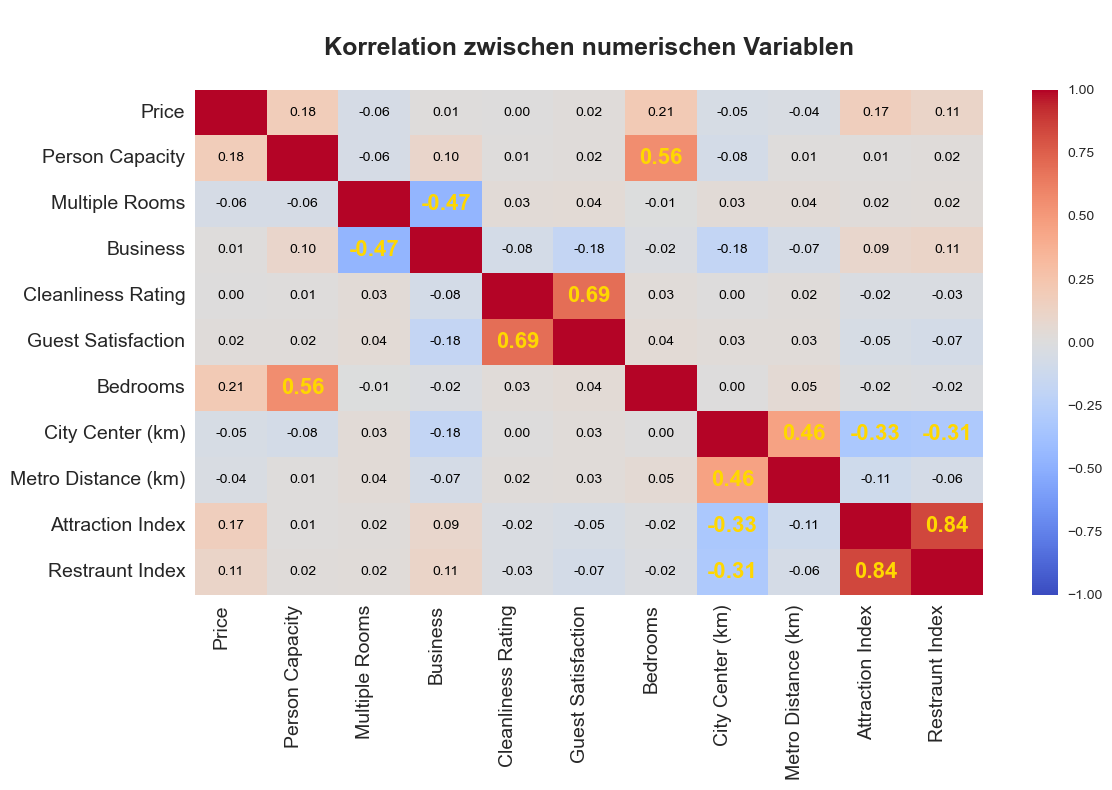

In [ ]:
plt.figure(figsize=(12,8))

# Numerische Spalten auswählen, Week_Price und Weekend_Price entfernen
numerical_cols = df.select_dtypes(include='number').drop(columns=['Normalised Attraction Index','Normalised Restraunt Index','Week_Price', 'Weekend_Price', 'Combined Score'], errors='ignore')

corr_matrix = numerical_cols.corr()

# Heatmap ohne Annotation
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Annotation manuell
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        value = corr_matrix.iloc[i,j]
        if abs(value) == 1:
            continue  # 1er-Korrelationen leer lassen
        elif 0.3 <= abs(value) < 1:
            plt.text(j+0.5, i+0.5, f"{value:.2f}", ha='center', va='center', fontsize=16, fontweight='bold', color='gold')
        else:
            plt.text(j+0.5, i+0.5, f"{value:.2f}", ha='center', va='center', fontsize=10, color='black')

plt.xticks(fontsize=14, rotation=90, ha='right')
plt.yticks(fontsize=14, rotation=0)
plt.title('\nKorrelation zwischen numerischen Variablen\n', fontsize = 18, fontweight='bold')
plt.tight_layout()
plt.show()

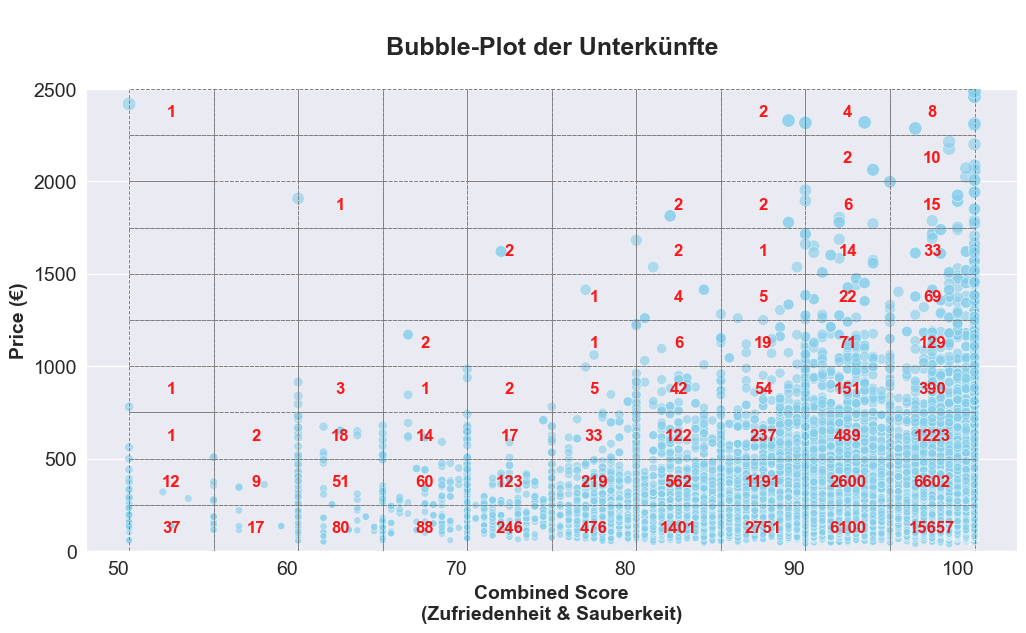

In [257]:
# Combined Score erstellen
df['Combined Score'] = (df['Cleanliness Rating']*10 + df['Guest Satisfaction']) / 2
# Filter: Combined Score >=50 und Preis <=2500
df_filtered = df[(df['Combined Score'] >= 50) & (df['Price'] <= 2500)]
plt.figure(figsize=(12,6))
# Bubble-Plot mit dunkelblauen Bubbles
sns.scatterplot(
    x='Combined Score',
    y='Price',
    size='Price',
    data=df_filtered,
    alpha=0.6,
    legend=False,
    color='skyblue'
)
# Raster definieren
x_bins = np.arange(50, 105, 5)   # Combined Score 50-100
y_bins = np.arange(0, 2600, 250) # Price 0-2500 in 250er Schritten
# Zählen, wie viele Bubbles in jedem Raster liegen
hist, x_edges, y_edges = np.histogram2d(df_filtered['Combined Score'], df_filtered['Price'], bins=[x_bins, y_bins])
# Rasterzahlen und Kästchen ins Diagramm einfügen
for i in range(len(x_edges)-1):
    for j in range(len(y_edges)-1):
        count = int(hist[i, j])
        x_left, x_right = x_edges[i], x_edges[i+1]
        y_bottom, y_top = y_edges[j], y_edges[j+1]
        # Kästchen zeichnen
        plt.gca().add_patch(plt.Rectangle(
            (x_left, y_bottom),
            x_right - x_left,
            y_top - y_bottom,
            fill=False,
            edgecolor='gray',
            linestyle='--',
            linewidth=0.7
        ))
        # Anzahl der Bubbles in der Zelle anzeigen
        if count > 0:
            x_pos = (x_left + x_right) / 2
            y_pos = (y_bottom + y_top) / 2
            plt.text(
                x_pos,
                y_pos,
                str(count),
                ha='center',
                va='center',
                fontsize=12,
                color='red',
                fontweight='bold',  # Schrift fett
                alpha=0.9
            )

plt.xticks(fontsize=14, rotation=0, ha='right')
plt.yticks(fontsize=14, rotation=0)
plt.xlabel("Combined Score\n(Zufriedenheit & Sauberkeit)", fontsize=14, fontweight='bold')
plt.ylabel("Price (€)", fontsize=14, fontweight='bold')
plt.title("\nBubble-Plot der Unterkünfte\n", fontsize=18, fontweight='bold')
plt.ylim(0, 2500)
plt.grid(True)
plt.show()

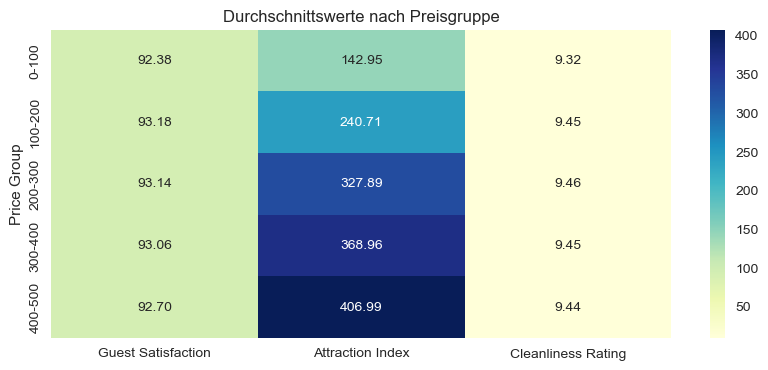

In [371]:
# Preisgruppen definieren
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500']
df['Price Group'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True, right=True)

# Gruppieren mit observed=True
grouped = df.groupby('Price Group', observed=True)[['Guest Satisfaction', 'Attraction Index', 'Cleanliness Rating']].mean()

# Plot
plt.figure(figsize=(10,4))
sns.heatmap(grouped, annot=True, cmap='YlGnBu', fmt=".2f")
plt.yticks(rotation=90)
plt.title('Durchschnittswerte nach Preisgruppe')
plt.show()

***Geographische Karte***

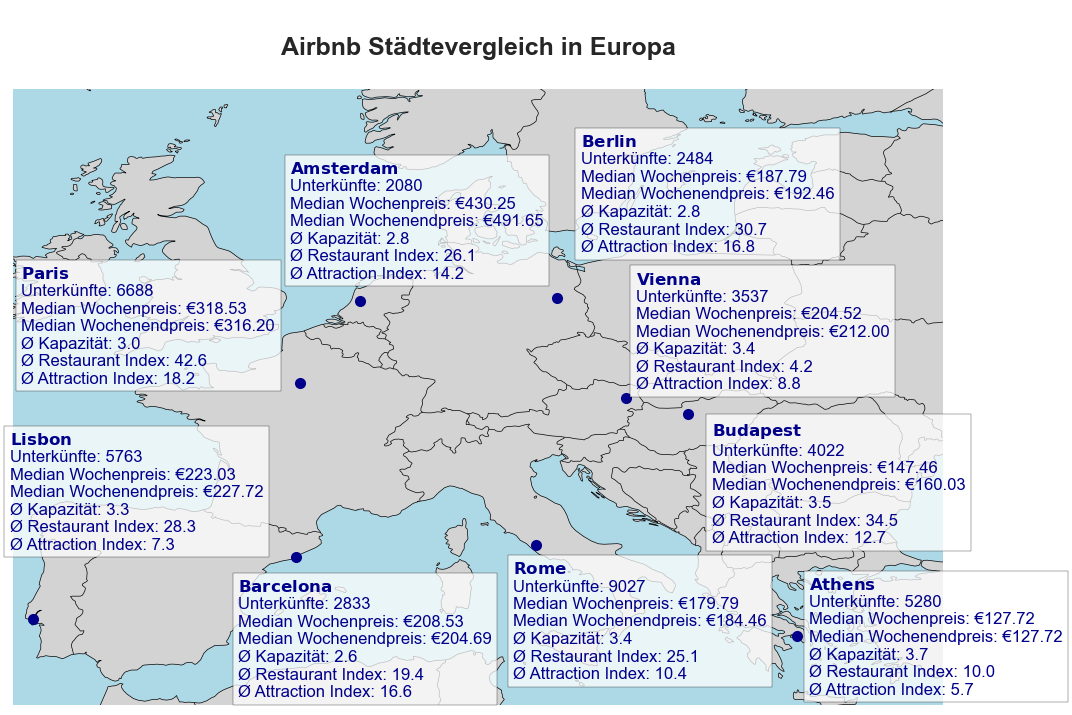

In [ ]:
# --- 1. Daten vorbereiten ---
df = df.copy()

# Wochen-/Wochenendpreis
df['Week_Price'] = df.loc[df['Day'] == 'Weekday', 'Price']
df['Weekend_Price'] = df.loc[df['Day'] == 'Weekend', 'Price']

# Gruppieren nach Stadt und Aggregationen
city_stats = df.groupby('City').agg(
    Median_Week_Price=('Week_Price', 'median'),
    Median_Weekend_Price=('Weekend_Price', 'median'),
    Count=('Price', 'size'),
    Avg_Person_Capacity=('Person Capacity', 'mean'),
    Avg_Restaurant_Index=('Normalised Restraunt Index', 'mean'),
    Avg_Attraction_Index=('Normalised Attraction Index', 'mean')
).reset_index()

# Latitude/Longitude für die 9 Städte
lat_lon_dict = {
    'Athens': (37.9838, 23.7275),
    'Budapest': (47.4979, 19.0402),
    'Lisbon': (38.7169, -9.1398),
    'Barcelona': (41.3851, 2.1734),
    'Amsterdam': (52.3676, 4.9041),
    'Paris': (48.8566, 2.3522),
    'Rome': (41.9028, 12.4964),
    'Vienna': (48.2082, 16.3738),
    'Berlin': (52.5200, 13.4050)
}

city_stats['lat'] = city_stats['City'].map(lambda x: lat_lon_dict[x][0])
city_stats['lon'] = city_stats['City'].map(lambda x: lat_lon_dict[x][1])

# --- 2. Europakarte erstellen ---
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 35, 60])  # Europa-Bereich

# Ländergrenzen & Küstenlinien
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Städte plotten + Infoboxen
for _, row in city_stats.iterrows():
    ax.plot(row['lon'], row['lat'], 'o', color='darkblue', markersize=8, transform=ccrs.PlateCarree())
    
    # Budapest etwas nach rechts und unten verschieben
    if row['City'] == 'Budapest':
        x_offset = 1   # rechts
        y_offset = -5.5   # etwas nach unten
    
    elif row['City'] == 'Berlin':
        x_offset = 1   # rechts
        y_offset = 2   # etwas nach unten
        
    elif row['City'] == 'Amsterdam':
        x_offset = -3   # rechts
        y_offset = 1   # etwas nach unten
    
    elif row['City'] == 'Paris':
        x_offset = -12   # rechts
        y_offset = 0   # etwas nach unten
        
    elif row['City'] == 'Rome':
        x_offset = -1  # rechts
        y_offset = -5.75   # etwas nach unten
        
    elif row['City'] == 'Barcelona':
        x_offset = - 2.5  # rechts
        y_offset = -6   # etwas nach unten
    
    elif row['City'] == 'Athens':
        x_offset = 0.5  # rechts
        y_offset = -2.5   # etwas nach unten
    
    elif row['City'] == 'Lisbon':
        x_offset = -1  # rechts
        y_offset = 3   # etwas nach unten
    
    else:
        x_offset = 0.4
        y_offset = 0.4
        
    info_text = (
        f"$\\bf{{{row['City']}}}$\n"
        f"Unterkünfte: {row['Count']}\n"
        f"Median Wochenpreis: €{row['Median_Week_Price']:.2f}\n"
        f"Median Wochenendpreis: €{row['Median_Weekend_Price']:.2f}\n"
        f"Ø Kapazität: {row['Avg_Person_Capacity']:.1f}\n"
        f"Ø Restaurant Index: {row['Avg_Restaurant_Index']:.1f}\n"
        f"Ø Attraction Index: {row['Avg_Attraction_Index']:.1f}"
    )
    
    ax.text(
        row['lon'] + x_offset, 
        row['lat'] + y_offset,
        info_text,
        fontsize=12,
        color='darkblue',
        transform=ccrs.PlateCarree(),
        bbox=dict(facecolor="white", alpha=0.75, edgecolor="black")
    )



plt.title("\nAirbnb Städtevergleich in Europa\n", fontsize=18, fontweight="bold")
plt.show()


***Entfernungs Radar***

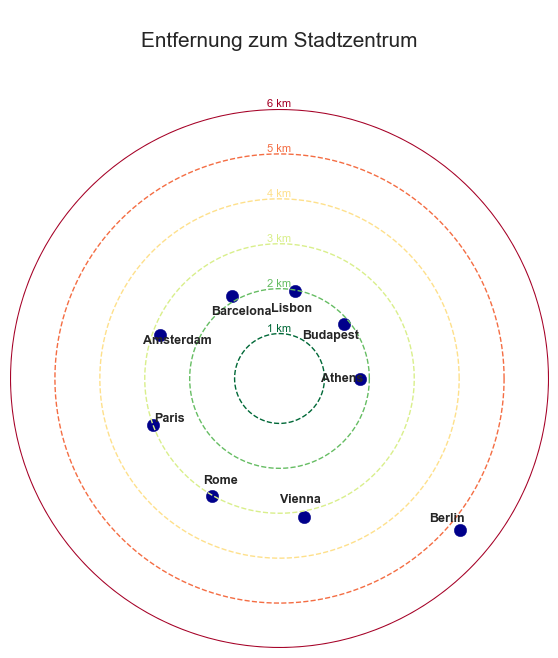

In [ ]:
# Mittelwerte pro Stadt berechnen
city_means = df.groupby("City")["City Center (km)"].mean().sort_values()
labels = city_means.index.tolist()
values = city_means.values.tolist()

# Winkel berechnen (jede Stadt eine Richtung)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Maximalen Radius bestimmen (auf nächste ganze km aufrunden)
max_radius = int(np.ceil(max(values)))

# Farben für die Innenlinien
inner_colors = np.linspace(0, 1, max_radius)
line_colors = [plt.cm.RdYlGn(1 - c) for c in inner_colors]  # 0=rot außen, 1=grün innen

# Radar vorbereiten
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.set_facecolor('white')  # Hintergrundfarbe

# Innenlinien plotten
for r in range(1, max_radius + 1):
    # Linie bei 0.75 km dunkelgelb
    if abs(r - 0.75) < 1e-5:
        color = 'goldenrod'  # dunkelgelb
    else:
        color = line_colors[r-1]
    
    if r == max_radius:  # Außenlinie durchgehend
        ax.plot(np.linspace(0, 2*np.pi, 360), [r]*360, color=color, linewidth=1.5)
    else:  # alle innen gestrichelt
        ax.plot(np.linspace(0, 2*np.pi, 360), [r]*360, color=color, linewidth=1, linestyle='--')
    
    # Beschriftung km direkt an Linie
    ax.text(np.pi/2, r, f"{r} km", ha='center', va='bottom', fontsize=8, color=color)

# Punkte plotten
ax.scatter(angles, values, c="darkblue", s=80)

# Stadt-Namen direkt an die Punkte
for angle, value, label in zip(angles, values, labels):
    ax.text(angle, value - 0.4, label, ha="center", va="center", fontsize=9, fontweight='bold')

# Radius und Winkel
ax.set_ylim(0, max_radius)
ax.set_yticks([])  # Zahlen weg
ax.set_xticks([])  # Winkel-Beschriftungen weg

plt.title("\nEntfernung zum Stadtzentrum", size=15, y=1.1)
plt.show()


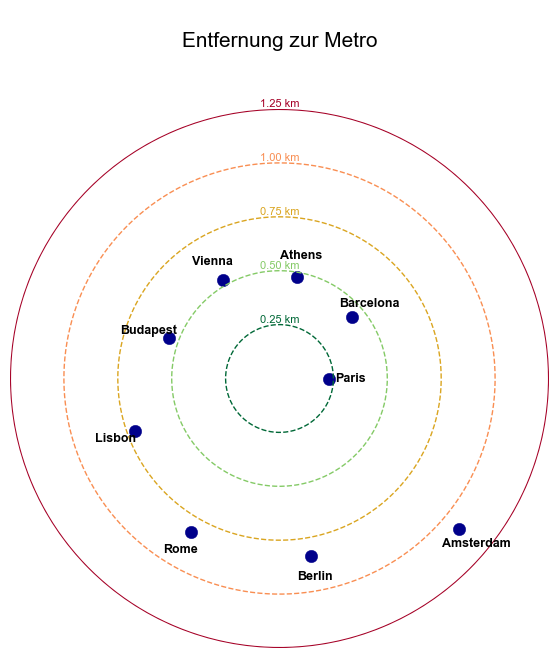

In [284]:
import numpy as np
import matplotlib.pyplot as plt

# Mittelwerte pro Stadt berechnen (Metro Distance)
city_means = df.groupby("City")["Metro Distance (km)"].mean().sort_values()
labels = city_means.index.tolist()
values = city_means.values.tolist()

# Winkel berechnen (jede Stadt eine Richtung)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Maximalen Radius bestimmen (auf nächste 0.25 km aufrunden)
max_radius = np.ceil(max(values) * 4) / 4  # z.B. 1.62 -> 1.75 km

# Anzahl der Linien für 0,25 km Schritte
num_lines = int(max_radius / 0.25)

# Farben für die Innenlinien
inner_colors = np.linspace(0, 1, num_lines)
line_colors = [plt.cm.RdYlGn(1 - c) for c in inner_colors]  # grün innen, rot außen

# Radar vorbereiten
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.set_facecolor('white')  # Hintergrundfarbe

# Innenlinien plotten
for idx in range(1, num_lines + 1):
    r = idx * 0.25
    
    # Linie bei 0.75 km dunkelgelb
    if abs(r - 0.75) < 1e-5:
        color = 'goldenrod'  # dunkelgelb
    else:
        color = line_colors[idx - 1]
    
    if idx == num_lines:  # Außenlinie durchgehend
        ax.plot(np.linspace(0, 2*np.pi, 360), [r]*360, color=color, linewidth=1.5)
    else:  # alle innen gestrichelt
        ax.plot(np.linspace(0, 2*np.pi, 360), [r]*360, color=color, linewidth=1, linestyle='--')
    
    # Beschriftung km direkt an Linie
    ax.text(np.pi/2, r, f"{r:.2f} km", ha='center', va='bottom', fontsize=8, color=color)

# Punkte plotten
ax.scatter(angles, values, c="darkblue", s=80)

# Stadt-Namen direkt an die Punkte
for angle, value, label in zip(angles, values, labels):
    ax.text(angle, value + 0.1, label, ha="center", va="center", fontsize=9, color="black", fontweight='bold')

# Radius und Winkel
ax.set_ylim(0, max_radius)
ax.set_yticks([])  # Zahlen weg
ax.set_xticks([])  # Winkel-Beschriftungen weg

plt.title("\nEntfernung zur Metro", size=15, y=1.1, color="black")
plt.show()
